# e.g. 6: Compare monthly nino34 time-series from monthly inputs from 2 forecast runs & control & observations

# last edited 25 July 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
cafe_monthly_files_1st= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r2i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r3i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r4i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r4i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r5i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r5i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r6i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CA

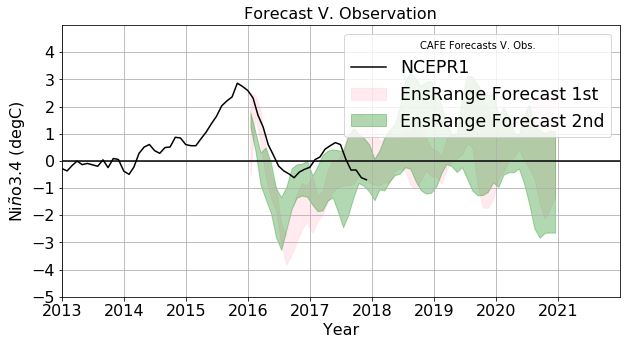

END


In [2]:
print('BEGIN')

import socket
import re
import os
import sys

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir_ncep='/OSM/CBR/OA_DCFP/data/CAFEPP/'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
  #from decadal_diag import n_data_funcs  
  from decadal_diag import nino_indices
  from decadal_diag import plot_xy
  
  ###
  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  from matplotlib.mlab import griddata

  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple
    
  from n_data_funcs import n_data_funcs
  
  model='CAFE'
  nino_index_k=0
    
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

  pval_1st=1 #v1_forecast
  cafe_monthly_files_1st,cafe_monthly_files_flat_1st=[],[]
  for ensemble in range(2,11+1):
    cafe_inner_monthly_files_1st=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_1st)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_1st=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_1st)+'f1_gn_201601-202012.nc']
    for file in monthly_ifils_1st:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_1st.append(idir+'/'+file)
    cafe_monthly_files_1st.append(cafe_inner_monthly_files_1st)

  print('cafe_monthly_files_1st=',cafe_monthly_files_1st)

#===============================================================================

  pval_2nd=4 #v0_forecast
  cafe_monthly_files_2nd,cafe_monthly_files_flat_2nd=[],[]
  for ensemble in range(2,11+1):
    cafe_inner_monthly_files_2nd=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_2nd=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1_gn_201601-202012.nc']
    for file in monthly_ifils_2nd:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_2nd.append(idir+'/'+file)
    cafe_monthly_files_2nd.append(cafe_inner_monthly_files_2nd)

  print('cafe_monthly_files_2nd=',cafe_monthly_files_2nd)

#===============================================================================
  grid_label='cafep'
  cafe_calendar='julian'
  
  pval=9

  cafe_control_calendar='noleap'

  idir_control=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'

  ifils_control= [ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047101-050012.nc']
  cafe_files_control=[[idir_control+'/'+ifils_control[0]]]

  ifils_control= \
    [ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_046101-047012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047101-048012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_048101-049012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_049101-050012.nc' \
    ]
  cafe_files_control=[[idir_control+'/'+ifils_control[1],idir_control+'/'+ifils_control[2], idir_control+'/'+ifils_control[3]]]

  print('cafe_files_control=',cafe_files_control)
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  clevs=None
  
#===============================================================================

  product='NCEPR1'

  ivar_str_ncepr1='skt';ifil_prefix_ncepr1='skt';offset=0.0;scale=1.0;long_name='Surface Temperature';units='degC'

  grid_label='ncep_r1'
  ncepr1_calendar='proleptic_gregorian'

  ncepr1_files,ncepr1_files_flat=[],[]
  idir=topdir_ncep+'short/r67/mac599/data/NCEP_R1'
  ifils=[ifil_prefix_ncepr1+'.mon.mean.nc']
  for file in ifils:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      ncepr1_files.append(idir+'/'+file)  
  ncepr1_files=[ncepr1_files]

  print('ncepr1_files=',ncepr1_files)
  
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=1971
  cend=2000
  abeg=1971
  aend=2017
  
  ###
  
  grid_label='ncep2'
  ncepr1_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')

  #print(dir(ncepr1_nino_indices))
  #print((ncepr1_nino_indices.indices_label))
  
  ncepr1_file_var=n_data_funcs(Diag=False,input_files=ncepr1_files,input_var_name=ivar_str_ncepr1)

  ncepr1_file_var.calculate_filedatetime_info(Diag=False,calendar=ncepr1_calendar)

  ncepr1_file_var.get_latlon_info(Diag=False)

  ncepr1_monthly_nino=ncepr1_file_var.calculate_quantity(ncepr1_nino_indices,Diag=True,quantity='nino')

  ncepr1_nino_annual_climatology,ncepr1_nino_annual_anomaly=ncepr1_file_var.monthly_clim_anom( \
    Diag=False,input=ncepr1_monthly_nino,AnnOut=False,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend) #cbeg=cbeg,cend=cend,abeg=abeg,aend=aend,Diag=False)     

  input_datas=(ncepr1_nino_annual_anomaly[:,nino_index_k],)
  input_xvals=(ncepr1_file_var.year_fraction_anomaly,)
  
#   input_xval=ncepr1_file_var.year_fraction_anomaly
#   input_datas,input_xvals = (),()
#   for n in range(0,4):
#     input_datas = input_datas + (ncepr1_nino_annual_anomaly[:,n],)
#     input_xvals = input_xvals + (input_xval,)

#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='NCEPR1', \
#     units=units, \
#     xlab='Year', \
#     ylab=ncepr1_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5))

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=471
  cend=500
  abeg=471
  aend=500
  
  grid_label='gn'
  cafe_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  cafe_monthly_files_control=n_data_funcs(Diag=False,input_files=cafe_files_control,input_var_name=ivar_str_cafe)

  cafe_monthly_files_control.calculate_filedatetime_info(Diag=False,calendar=cafe_control_calendar)

  cafe_monthly_files_control.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_monthly_nino_from_monthly_control=cafe_monthly_files_control.calculate_quantity(cafe_nino_indices, Diag=False, quantity='nino')

  cafe_nino_annual_climatology_from_monthly_control, \
  cafe_nino_annual_anomaly_from_monthly_control=cafe_monthly_files_control.monthly_clim_anom( \
    Diag=False, input=cafe_monthly_nino_from_monthly_control, AnnOut=False, ZeroClim=False)
  
  input_xval=cafe_monthly_files_control.year_fraction_anomaly
  input_datas,input_xvals = (),()
  for n in range(0,4):
    input_datas = input_datas + (cafe_nino_annual_anomaly_from_monthly_control[:,n],)
    input_xvals = input_xvals + (input_xval,)

#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='CAFE CONT.', \
#     units=units, \
#     xlab='Year', \
#     ylab=cafe_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5))

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================
  
  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020
  
  cafe_monthly_files_1st=n_data_funcs(input_files=cafe_monthly_files_1st,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_1st.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_monthly_files_1st.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_nino_monthly_1st=cafe_monthly_files_1st.calculate_quantity(cafe_nino_indices, quantity='nino')

  cafe_nino_annual_climatology_from_monthly_1st,cafe_nino_annual_anomaly_from_monthly_1st=cafe_monthly_files_1st.monthly_clim_anom( \
    Diag=False, input=cafe_nino_monthly_1st, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  print('cafe_nino_annual_anomaly_from_monthly_1st.shape=',cafe_nino_annual_anomaly_from_monthly_1st.shape)
  
  input_xval=cafe_monthly_files_1st.year_fraction_anomaly
  
#   input_datas,input_xvals = (),()
#   for n in range(0,4):
#     input_datas = input_datas + (cafe_nino_annual_anomaly_from_monthly_1st[:,n],)
#     input_xvals = input_xvals + (input_xval,)
    
#   input_datas = (np.average(cafe_nino_annual_anomaly_from_monthly_1st[:,:,nino_index_k],axis=1),)
#   input_xvals = (input_xval,)
  
#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='CAFE 1st', \
#     units=units, \
#     xlab='Year', \
#     ylab=cafe_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5))
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020
  
  cafe_monthly_files_2nd=n_data_funcs(input_files=cafe_monthly_files_2nd,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_2nd.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_monthly_files_2nd.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_nino_monthly_2nd=cafe_monthly_files_2nd.calculate_quantity(cafe_nino_indices, quantity='nino')

  cafe_nino_annual_climatology_from_monthly_1st,cafe_nino_annual_anomaly_from_monthly_2nd=cafe_monthly_files_2nd.monthly_clim_anom( \
    Diag=False, input=cafe_nino_monthly_2nd, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  print('cafe_nino_annual_anomaly_from_monthly_2nd.shape=',cafe_nino_annual_anomaly_from_monthly_2nd.shape)

  input_xval=cafe_monthly_files_2nd.year_fraction_anomaly
    
#   input_datas,input_xvals = (),()
#   for n in range(0,4):
#     input_datas = input_datas + (dim_avg_n(cafe_nino_annual_anomaly_from_monthly_2nd[:,n,:],axis=1),)
#     input_xvals = input_xvals + (cafe_monthly_files_2nd.year_fraction_anomaly,)
 
#   input_datas = (np.average(cafe_nino_annual_anomaly_from_monthly_2nd[:,:,nino_index_k],axis=1),)
#   input_xvals = (input_xval,)
    
#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='CAFE 1st', \
#     units=units, \
#     xlab='Year', \
#     ylab=cafe_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     xysize=(10,5))
    
#===============================================================================
  
#   input_xvals = (ncepr1_file_var.year_fraction_anomaly,)
#   input_datas = (ncepr1_nino_annual_anomaly[:,nino_index_k],)

# #   input_xvals = input_xvals + (cafe_monthly_files_control.year_fraction_anomaly,)
# #   input_datas = input_datas + (cafe_nino_annual_anomaly_from_monthly_control[:,n],)

#   input_xvals = input_xvals + (cafe_monthly_files_1st.year_fraction_anomaly,)
#   input_datas = input_datas + (np.average(cafe_nino_annual_anomaly_from_monthly_1st[:,:,nino_index_k],axis=1),) 

#   input_xvals = input_xvals + (cafe_monthly_files_2nd.year_fraction_anomaly,)
#   input_datas = input_datas + (np.average(cafe_nino_annual_anomaly_from_monthly_2nd[:,:,nino_index_k],axis=1),)

#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='NEW', \
#     units=units, \
#     xlab='Year', \
#     ylab=ncepr1_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     grid=True, \
#     xysize=(10,5), \
#     xticks=np.arange(1970,2020,1), \
#     yticks=np.arange(-4,4,1), \
#     x_lab_rotation='vertical', \
#     y_lab_rotation='vertical')

#===============================================================================

#   input_xvals = (ncepr1_file_var.year_fraction_anomaly,)
#   input_datas = (ncepr1_nino_annual_anomaly[:,nino_index_k],)
  
#   line_colors = []
#   line_colors.append('blue')
  
#   for ensemble in range(0,10):
#     input_datas = input_datas + (cafe_nino_annual_anomaly_from_monthly_2nd[:,ensemble,nino_index_k],)
#     input_xvals = input_xvals + (cafe_monthly_files_2nd.year_fraction_anomaly.year_fraction_anomaly,)
#     line_colors.append('grey')
    
#   plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
#     title='NEW', \
#     units=units, \
#     xlab='Year', \
#     ylab=ncepr1_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
#     zero2=True, \
#     reverse_xaxis=False, \
#     reverse_yaxis=False, \
#     grid=True, \
#     xysize=(10,5), \
#     xlim=[2013,2025], \
#     line_colors=line_colors)

#===============================================================================

  input_xvals = (ncepr1_file_var.year_fraction_anomaly,)
  input_datas = (ncepr1_nino_annual_anomaly[:,nino_index_k],)

  input_xvals = input_xvals + (cafe_monthly_files_1st.year_fraction_anomaly,)
  input_datas = input_datas + (np.min(cafe_nino_annual_anomaly_from_monthly_1st[:,:,nino_index_k],axis=1),)
                               
  input_xvals = input_xvals + (cafe_monthly_files_1st.year_fraction_anomaly,)
  input_datas = input_datas + (np.max(cafe_nino_annual_anomaly_from_monthly_1st[:,:,nino_index_k],axis=1),)
  
  input_xvals = input_xvals + (cafe_monthly_files_2nd.year_fraction_anomaly,)
  input_datas = input_datas + (np.min(cafe_nino_annual_anomaly_from_monthly_2nd[:,:,nino_index_k],axis=1),)
                               
  input_xvals = input_xvals + (cafe_monthly_files_2nd.year_fraction_anomaly,)
  input_datas = input_datas + (np.max(cafe_nino_annual_anomaly_from_monthly_2nd[:,:,nino_index_k],axis=1),)
    
plot_xy(Diag=False, \
  input_data=input_datas, \
  input_xvals=input_xvals, \
  title='Forecast V. Observation', \
  units=units, \
  xlab='Year', \
  ylab=ncepr1_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  grid=True, \
  xysize=(10,5), \
  xlim=[2013,2022], \
  ylim=[-5,5], \
  fill_between=[0,1,1,2,2], \
  xticks=np.arange(2013,2022,1), \
  yticks=np.arange(-5,5,1), \
  legend_position='best', \
  line_colors=['black','pink','green'], \
  line_alphas=[1.0,0.3,0.3], \
  line_labels=['NCEPR1','EnsRange Forecast 1st','EnsRange Forecast 2nd'], \
  legend_title='CAFE Forecasts V. Obs.')

#===============================================================================

print('END')

In [ ]:
  colors = []
  colors.append('blue')
  for i,color in enumerate(range(10)):
    print(i)
    colors.append('grey')
  print(colors)